# Time Series Analysis of Cryptocurrency Litecoin

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_excel(r'/Users/radhikagarg/Desktop/data/Litecoin.xlsx')
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,MktCap,Tradecount
1156,2021-03-02,178.320,175.845,185.104,170.761,1120000.0,0.0133,11843018105,431134
1157,2021-03-03,187.812,179.061,196.097,176.955,163810000.0,0.0532,12553608189,875356
1158,2021-03-04,180.657,187.684,194.404,177.061,173560000.0,-0.0381,12058928099,595968
1159,2021-03-05,180.142,180.669,183.540,168.671,153390000.0,-0.0029,12039353700,410149
1160,2021-03-06,182.816,180.142,184.542,174.774,146260000.0,0.0148,12188376458,441332


In [4]:
print(df.info())
# 1161 rows depicting daily bitcoin prices from 2018 to 2021 with no issing data values in any feild

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1161 non-null   datetime64[ns]
 1   Price       1161 non-null   float64       
 2   Open        1161 non-null   float64       
 3   High        1161 non-null   float64       
 4   Low         1161 non-null   float64       
 5   Vol.        1161 non-null   float64       
 6   Change %    1161 non-null   float64       
 7   MktCap      1161 non-null   int64         
 8   Tradecount  1161 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 81.8 KB
None


Text(0.5, 1.0, 'Closing price Trend')

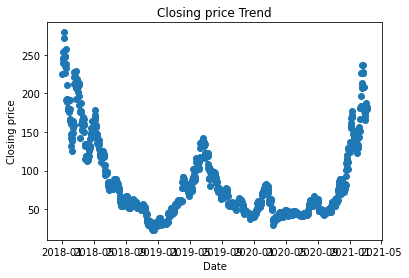

In [5]:
# PLOTTING Closing Prices against Dates.
plt.scatter(df.Date,df.Price)
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.title("Closing price Trend")

In [6]:
import datetime
df['Date']=pd.to_datetime(df['Date']) # setting month as index to exclude month from describe calcs
df.head()
df.describe()

,Price,Open,High,Low,Vol.,Change %,MktCap,Tradecount
count,1161.000000,1161.000000,1161.000000,1161.000000,1.161000e+03,1161.000000,1.161000e+03,1.161000e+03
mean,81.987101,82.026074,85.361220,78.261458,2.768726e+07,0.001308,5.013869e+09,9.906624e+04
std,48.996757,49.097460,51.824004,45.858625,7.154352e+07,0.054704,2.865581e+09,1.481156e+05
min,23.124000,23.124000,23.882000,22.362000,6.047000e+05,-0.385400,1.397819e+09,1.385000e+03
25%,47.086000,47.118000,48.453000,45.562000,3.160000e+06,-0.027400,3.025541e+09,3.007300e+04
50%,60.957000,60.957000,62.490000,58.768000,8.990000e+06,-0.001300,3.846220e+09,4.801400e+04
75%,101.601000,101.599000,106.536000,97.467000,1.269000e+07,0.026400,6.329505e+09,9.179800e+04
max,279.420000,279.420000,304.000000,265.240000,7.057200e+08,0.331600,1.620006e+10,1.330771e+06


In [7]:
df.set_index('Date',inplace=True)

# Differencing

Time-Series Components
There are three components of time-series data:
Trend: the movement of the data on a larger scale (moving average)
Seasonality: repeated seasonal fluctuations
Residual: any fluctuations not captured from trend or seasonality (should be random)
A time series can be modeled as an additive or multiplicative time-series depending on its nature of trend and seasonality.
Additive Time Series
observed = Trend + Seasonal + Residual
Multiplicative Time Series
observed = Trend × Seasonal × Residual

Based on data values, if the magnitude of seasonality changes over time (see image on the right), then the data 
is multiplicative. Our data, however, does not show clear evidence of growing or shrinking magnitude of seasonality,
so we assume it is an additive time series. Please take a look at it once again.

we are using freq= 7*4*3 (~3 months) to model our data. You can tune it by holding into trend visualizations. If the trend's visualizations are smooth, and the seasonal has patterns, then it's good to continue. 
The extrapolate_trend='freq' will make the length of the residual, trend, and seasonal the same by taking care of any missing values at the beginning of the series. 

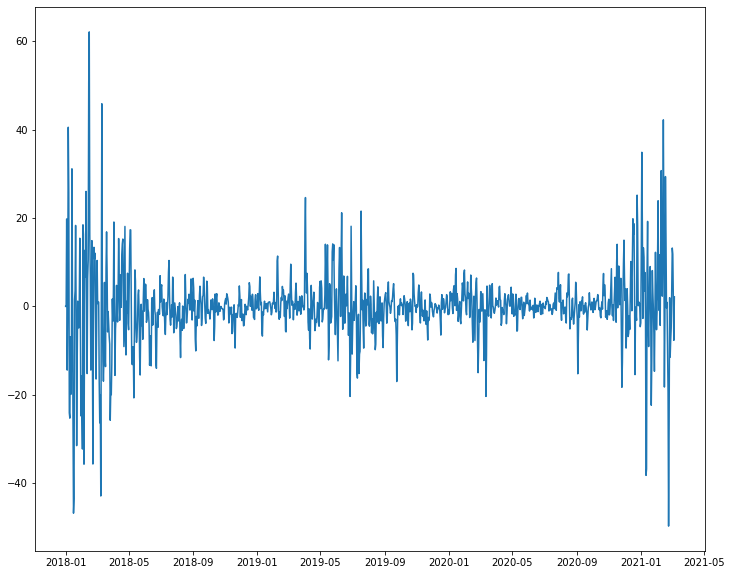

In [8]:
plt.figure(figsize=(12,10))
plt.plot(df['Price'].diff(2).fillna(0))

#hit and trial start with 5 fluctuate

In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    # Super not sure how to determin this... We'll have to do some research
    # 7 to 14 days seems reasonable to find overall trends
    rolmean = pd.Series(timeseries).rolling(window=14).mean()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in list(dftest[4].items()):
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

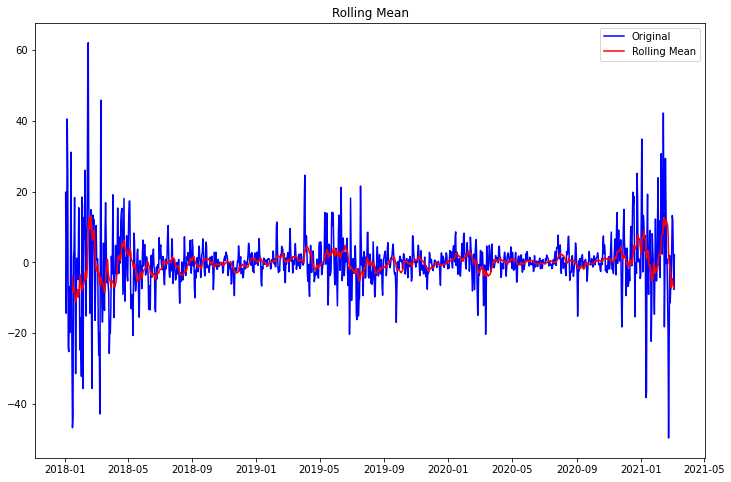

Results of Dickey-Fuller Test:
Test Statistic                -8.322790e+00
p-value                        3.535486e-13
#Lags Used                     2.300000e+01
Number of Observations Used    1.135000e+03
Critical Value (1%)           -3.436125e+00
Critical Value (5%)           -2.864090e+00
Critical Value (10%)          -2.568128e+00
dtype: float64


In [10]:
#prev 2 day dependency is seen
df['second_difference'] = df.Price - df.Price.shift(2)  
test_stationarity(df.second_difference.dropna(inplace=False))

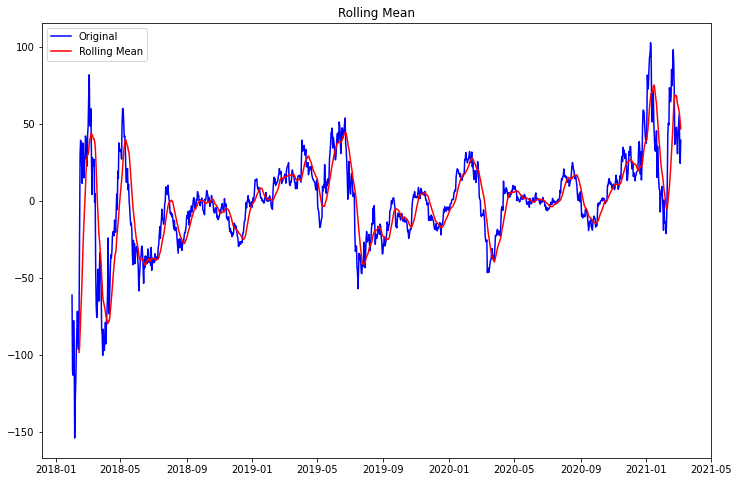

Results of Dickey-Fuller Test:
Test Statistic                -5.753378e+00
p-value                        5.895667e-07
#Lags Used                     1.600000e+01
Number of Observations Used    1.114000e+03
Critical Value (1%)           -3.436234e+00
Critical Value (5%)           -2.864138e+00
Critical Value (10%)          -2.568153e+00
dtype: float64


In [11]:
#prev 30 day dependency/monthly is not seen
df['month_difference'] = df.Price - df.Price.shift(30)  
test_stationarity(df.month_difference.dropna(inplace=False))

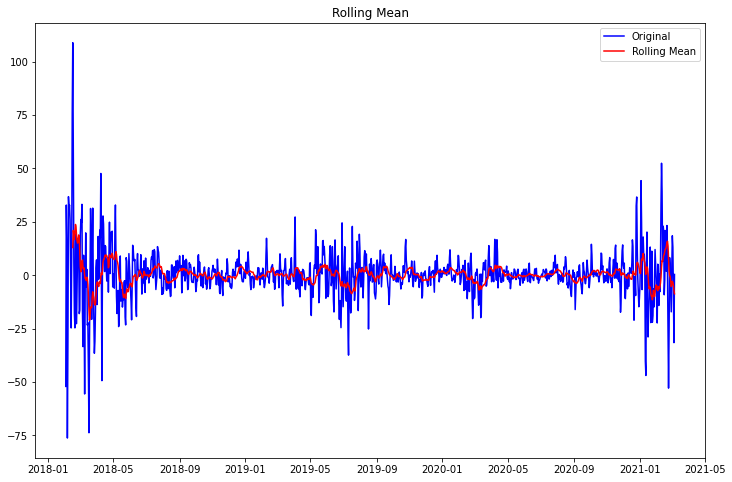

Results of Dickey-Fuller Test:
Test Statistic                -8.631251e+00
p-value                        5.747532e-14
#Lags Used                     1.900000e+01
Number of Observations Used    1.109000e+03
Critical Value (1%)           -3.436260e+00
Critical Value (5%)           -2.864150e+00
Critical Value (10%)          -2.568159e+00
dtype: float64


In [12]:
df['monthly_second_difference'] = df.second_difference - df.second_difference.shift(30)  
test_stationarity(df.monthly_second_difference.dropna(inplace=False))

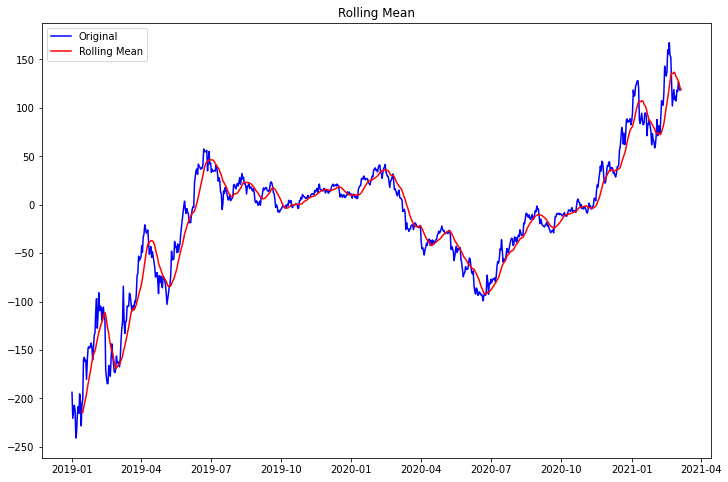

Results of Dickey-Fuller Test:
Test Statistic                  -2.107967
p-value                          0.241323
#Lags Used                       0.000000
Number of Observations Used    795.000000
Critical Value (1%)             -3.438602
Critical Value (5%)             -2.865182
Critical Value (10%)            -2.568710
dtype: float64


In [13]:
#prev 365 day dependency/annual is not seen
df['seasonal_difference'] = df.Price - df.Price.shift(365)  
test_stationarity(df.seasonal_difference.dropna(inplace=False))

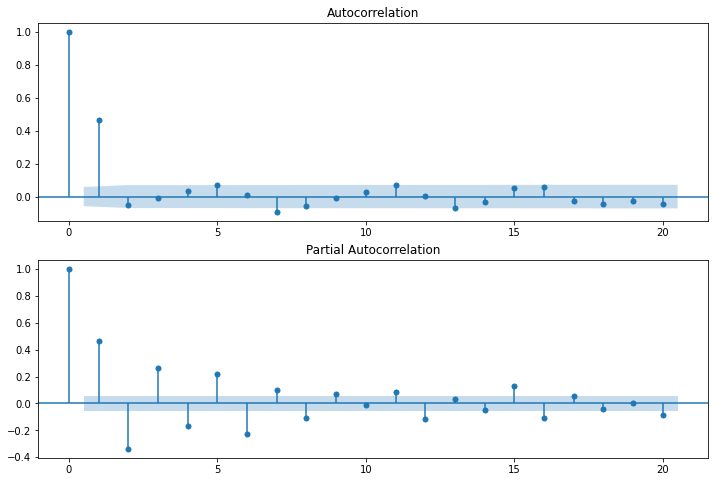

In [14]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.second_difference.iloc[30:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.second_difference.iloc[30:], lags=20, ax=ax2)
plt.show()

#p=2,
#d=2,
#q=2,

In [15]:
df.tail()

,Price,Open,High,Low,Vol.,Change %,MktCap,Tradecount,second_difference,month_difference,monthly_second_difference,seasonal_difference
Date,,,,,,,,,,,,
2021-03-02,178.320,175.845,185.104,170.761,1120000.0,0.0133,11843018105,431134,13.201,48.920,18.474,116.905
2021-03-03,187.812,179.061,196.097,176.955,163810000.0,0.0532,12553608189,875356,11.834,55.763,13.134,126.801
2021-03-04,180.657,187.684,194.404,177.061,173560000.0,-0.0381,12058928099,595968,2.337,38.741,-10.179,120.312
2021-03-05,180.142,180.669,183.540,168.671,153390000.0,-0.0029,12039353700,410149,-7.670,24.201,-31.562,118.085
2021-03-06,182.816,180.142,184.542,174.774,146260000.0,0.0148,12188376458,441332,2.159,39.106,0.365,119.605


# AR Model

ARIMA models will require (p, d, q) arguments as its order, 
where: 
- p: The number of lag included in the model, or also called lag order. Previously defined by looking into PACF visualization
- d: Order of difference. In previous section, we know that doing a difference once made the data stationary. Thus, we will use d=1 on original data.
- q: The size of moving average windows, or also called moving average order. Previously defined by looking into ACF visualization

In [16]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Price'],order=(2,2,2))
model_fit=model.fit()

#Based on the model summary, all variables (ar and ma) have a p-value <5%. This means that our model 
#really fits into the train data. The AIC, BIC, and HQIC is a score to measure the goodness of our model based on 
#the train data.

/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was p

In [17]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Price   No. Observations:                 1159
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -3703.724
Method:                       css-mle   S.D. of innovations              5.892
Date:                Tue, 06 Apr 2021   AIC                           7419.447
Time:                        19:17:05   BIC                           7449.779
Sample:                    01-03-2018   HQIC                          7430.893
                         - 03-06-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0011      0.000      2.353      0.019       0.000       0.002
ar.L1.D2.Price     0.0368      0.551      0.067      0.947      -1.044       1.117
ar.L2.D2.Price    -0.0704      0.034     -2.043      0.041      -0.138      -0.003
ma.L1.D2.Price    -1.0660      0.553     -1.927      0.054      -2.151       0.018
ma.L2.D2.Price     0.0660      0.553      0.119      0.905      -1.018       1.150
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2613           -3.7603j            3.7694           -0.2390
AR.2            0.2613           +3.7603j            3.7694            0.2390
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           15.1443           +0.0000j           15.1443            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:ylabel='Density'>

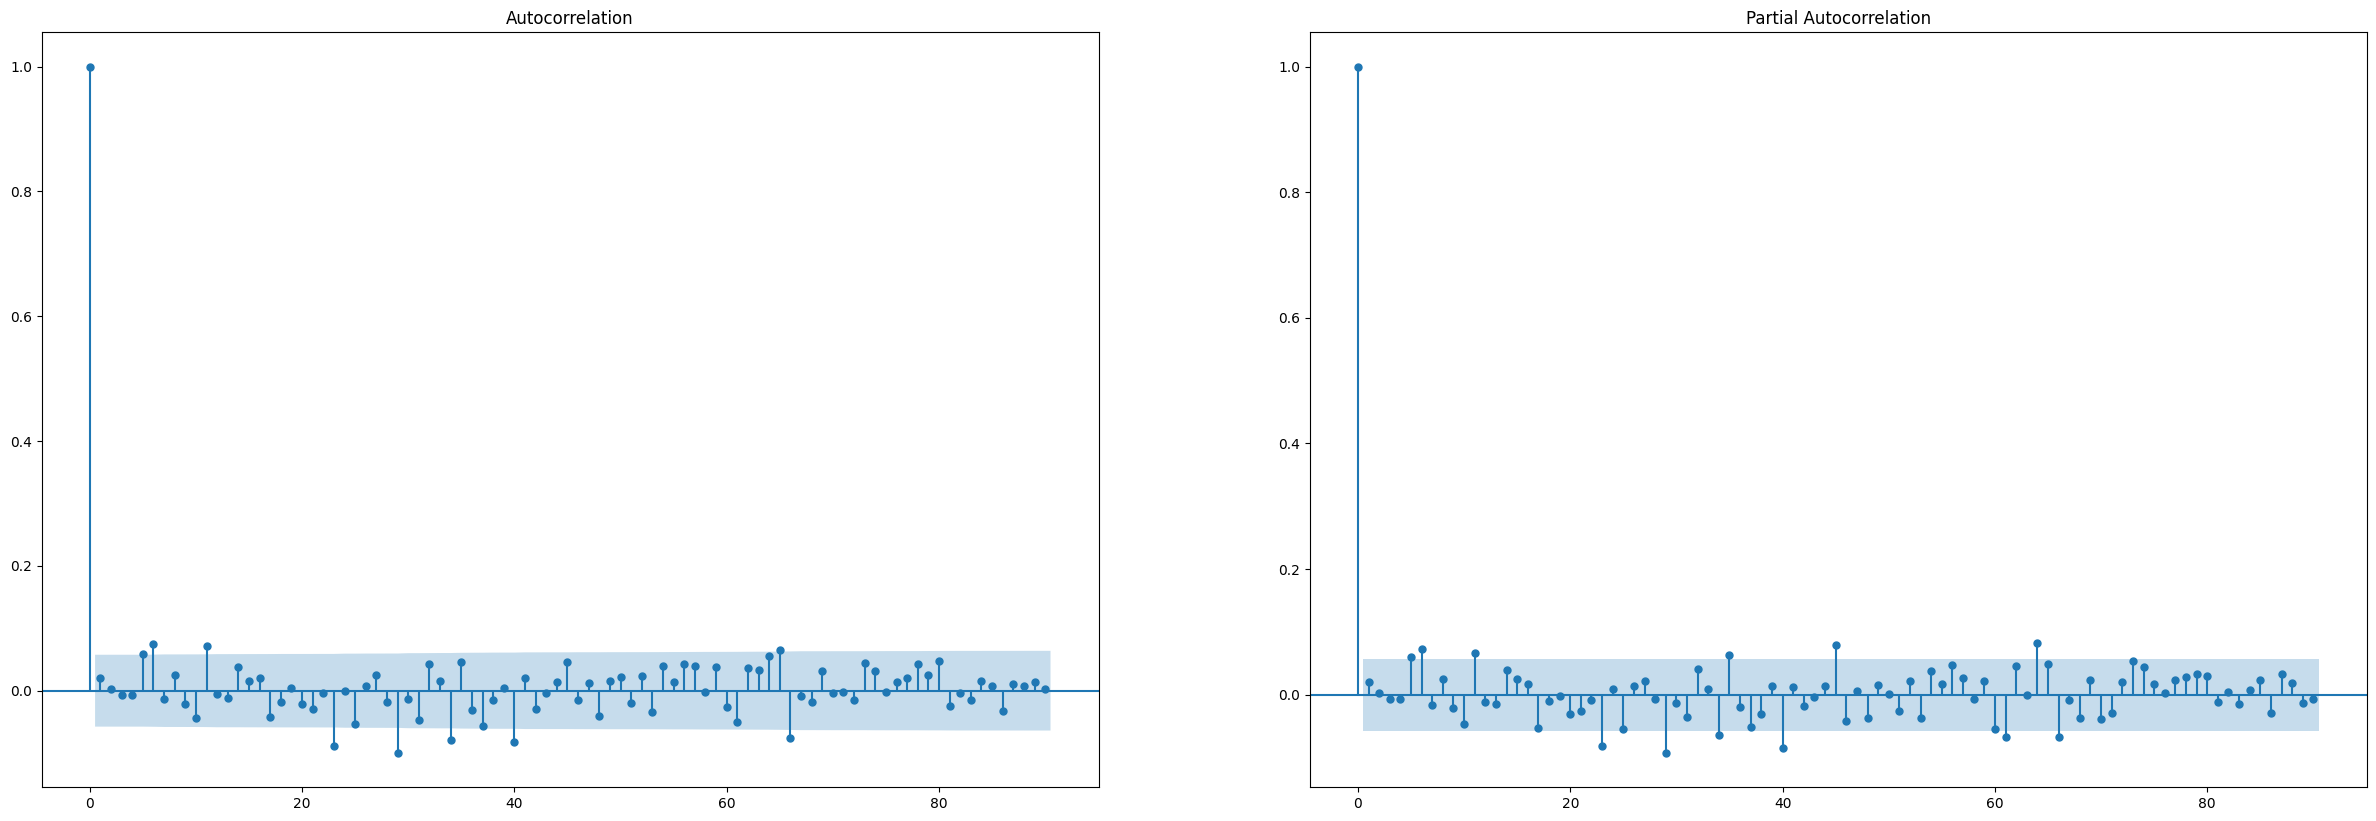

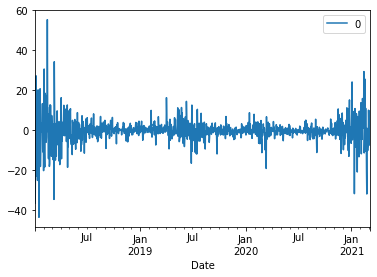

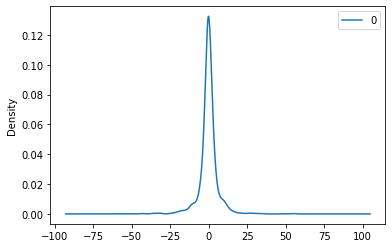

In [18]:
residuals = pd.DataFrame(model_fit.resid)
fig, axes = plt.subplots(1,2,figsize=(30,10), dpi= 100)
sm.graphics.tsa.plot_acf(residuals, lags=90, ax=axes[0])
sm.graphics.tsa.plot_pacf(residuals, lags=90, ax=axes[1])
residuals.plot()
residuals.plot(kind='kde')
#Now that we have our models, we don’t want the residuals to have autocorrelation. 
#Thus, let’s try to see the ACF-PACF values for each residual lag.

In [55]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df['Price'], start_p = 1, start_q = 1, 
                          max_p = 2, max_q = 2, m = 12, 
                          start_P = 0, seasonal = False, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',    # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

#https://alkaline-ml.com/pmdarima/0.9.0/modules/generated/pyramid.arima.auto_arima.html
#https://alkaline-ml.com/pmdarima/0.9.0/tips_and_tricks.html#period

/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=8234.358, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=7940.535, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8232.366, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=7774.845, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=7772.852, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=7938.542, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.974 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1161
Model:               SARIMAX(2, 2, 0)   Log Likelihood               -3883.426
Date:                Tue, 06 Apr 2021   AIC                           7772.852
Time:                        13:21:33   BIC                           7788.018
Sample:                             0   HQIC                          7778.575
                               - 1161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6555      0.014    -46.750      0.000      -0.683      -0.628
ar.L2         -0.3705      0.013    -27.674      0.000      -0.397      -0.344
sigma2        47.6067      0.797     59.748      0.000      46.045      49.168
===================================================================================
Ljung-Box (L1) (Q):                   8.39   Jarque-Bera (JB):              5804.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


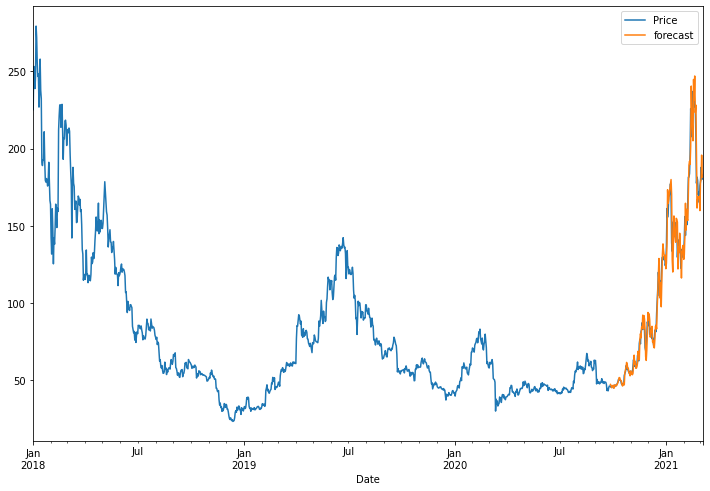

In [56]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Price'],order=(2,2,0),seasonal_order=(0,0,0,0))
model_fit=model.fit()
df['forecast']=model_fit.predict(start=1000,end=1160,dynamic=False)
df[['Price','forecast']].plot(figsize=(12,8))
plt.show()

In [57]:
from pandas.tseries.offsets import DateOffset

future_dates=[df.index[-1]+DateOffset(days=x) for x in range(0,366)]
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dates_df.tail()

,Price,Open,High,Low,Vol.,Change %,MktCap($),Tradecount,second_difference,seasonal_difference,monthly_second_difference,month_difference,forecast
2022-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

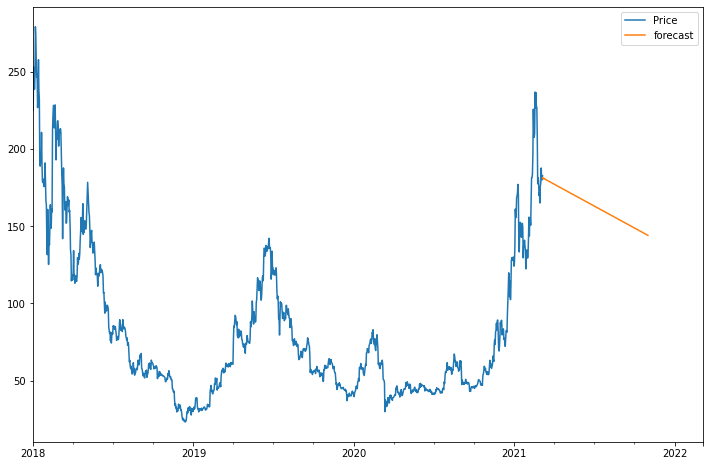

In [58]:
future_df=pd.concat([df,future_dates_df])
future_df['forecast']=model_fit.predict(start=1160,end=1400,dynamic=False)
future_df[['Price','forecast']].plot(figsize=(12,8))

In [61]:
from sklearn.model_selection import TimeSeriesSplit
data = pd.DataFrame(df["Price"])

#Specify fold and perform splitting
tscv = TimeSeriesSplit(n_splits=4)

#Find out no of observations in train and test sets
i=0
for train, test in tscv.split(data):
    i=i+1
    print ("No of observations under train%s=%s" % (i, len(train)))
    print ("No of observations under test%s=%s" % (i, len(test)))

No of observations under train1=233
No of observations under test1=232
No of observations under train2=465
No of observations under test2=232
No of observations under train3=697
No of observations under test3=232
No of observations under train4=929
No of observations under test4=232


In [62]:
train1, test1 = data.iloc[:233, 0], data.iloc[233:465, 0]
train2, test2 = data.iloc[:465, 0], data.iloc[465:697, 0]
train3, test3 = data.iloc[:697, 0], data.iloc[697:929, 0]
train4, test4 = data.iloc[:929, 0], data.iloc[929:1160, 0]

In [69]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#First fold RMSE
model1 = sm.tsa.statespace.SARIMAX(train1, order=(2,2,0)).fit()
pred1 = model1.predict(start=test1.index[0], end=test1.index[-1])
RMSE1=round(sqrt(mean_squared_error(test1, pred1)),2)

#Second fold RMSE
model2 = sm.tsa.statespace.SARIMAX(train2, order=(2,2,0)).fit()
pred2 = model2.predict(start=test2.index[0], end=test2.index[-1])
RMSE2=round(sqrt(mean_squared_error(test2, pred2)),2)

#Third fold RMSE
model3 = sm.tsa.statespace.SARIMAX(train3, order=(2,2,0)).fit()
pred3 = model3.predict(start=test3.index[0], end=test3.index[-1])
RMSE3=round(sqrt(mean_squared_error(test3, pred3)),2)

model4 = sm.tsa.statespace.SARIMAX(train4, order=(0,1,0)).fit()
pred4 = model4.predict(start=test4.index[0], end=test4.index[-1])
RMSE4=round(sqrt(mean_squared_error(test4, pred4)),2)



print ("RMSE1:", RMSE1)
print ("RMSE2:", RMSE2)
print ("RMSE3:", RMSE3)
print ("RMSE4:", RMSE4)

Overall_RMSE=round((RMSE1+RMSE2+RMSE3+RMSE4)/4,2)
print ("Overall RMSE:", Overall_RMSE) 


RMSE1: 31.09
RMSE2: 50.58
RMSE3: 14.87
RMSE4: 72.21
Overall RMSE: 42.19


/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/radhikagarg/opt/anaconda3/lib/python3.8/s

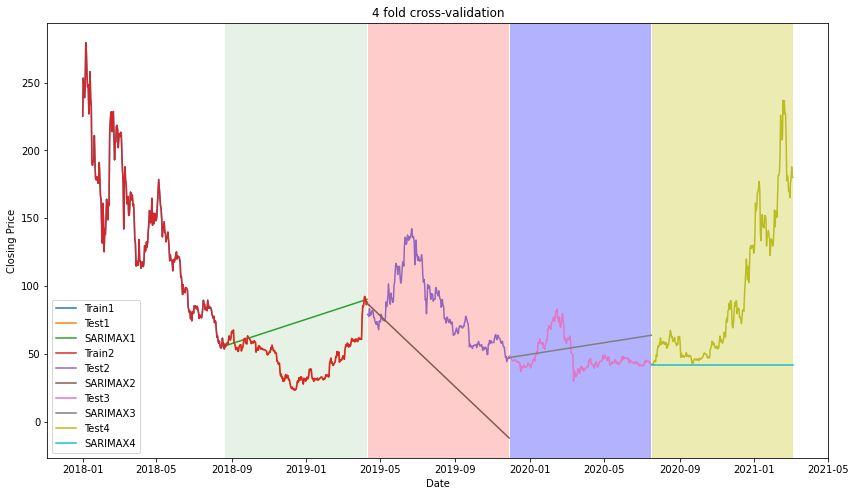

In [70]:
#plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 14,8

#Labels and titles
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("4 fold cross-validation")

#First fold- CV
plt.plot(train1.index, train1, label='Train1')
plt.plot(test1.index, test1, label='Test1')
plt.plot(pred1.index, pred1, label='SARIMAX1')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test1.index[0], test1.index[-1],  facecolor='g', alpha=0.1)

#Second fold
plt.plot(train2.index, train2, label='Train2')
plt.plot(test2.index, test2, label='Test2')
plt.plot(pred2.index, pred2, label='SARIMAX2')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test2.index[0], test2.index[-1],  facecolor='r', alpha=0.2)

#Third fold
plt.plot(test3.index, test3, label='Test3')
plt.plot(pred3.index, pred3, label='SARIMAX3')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test3.index[0], test3.index[-1],  facecolor='b', alpha=0.3)

plt.plot(test4.index, test4, label='Test4')
plt.plot(pred4.index, pred4, label='SARIMAX4')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test4.index[0], test4.index[-1],  facecolor='y', alpha=0.3)
